**Srcatch notebook group 3**

*Names: ARRIAU Emma, GUIGA Chloé, LUSCAN Pierre, MOSCHINI Irina*

# **1. Data preparation:**

## 1.1. data importation



In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#imports

import pandas as pd
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import unique
import warnings
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
import sklearn.metrics
from scipy import stats
from sklearn.utils import shuffle
from sklearn import decomposition

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#importing the red wine data set

winequality_red_import = pd.read_csv('/content/drive/My Drive/winequality-red.csv',delimiter=';')
winequality_red_import

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## 1.2. data exploration

### 1.2.1 data cleaning

In [0]:
#dropping duplicates

shape1 = winequality_red_import.shape
winequality_red = winequality_red_import.drop_duplicates() 
shape2 = winequality_red.shape

print("there were", shape1[0] - shape2[0], "duplicates")

#re-indexing the rows of the dataset

winequality_red = winequality_red.reset_index(drop=True) 
winequality_red

there were 240 duplicates


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1354,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1355,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1356,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1357,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### 1.2.2 data visualization : Descriptive statistics

In [0]:
#measures of central tendency (mean, median, mode)

winequality_red['quality'].describe()

count    1359.000000
mean        5.623252
std         0.823578
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

**Comments :** We can see that the feature "quality" in the red wine dataset is mostly spread between 5 and 6, and the mean of the quality is 5.6 which will guide our choice for the binary separation later on.

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning:

pylab import has clobbered these variables: ['shuffle', 'split']
`%matplotlib` prevents importing * from pylab and numpy



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fb4111f60>,
      dtype=object)

<Figure size 864x576 with 0 Axes>

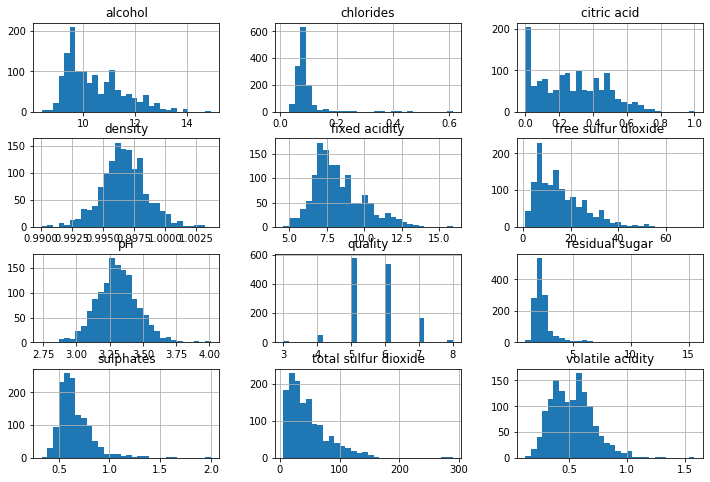

In [0]:
#plotting histograms to know how data is distributed 

column_name = [c for c in winequality_red.columns.values]
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 8)
length = winequality_red[column_name]
fig = plt.figure() 
length.hist(bins=30)

**Comments :** A large majority of the red wines have a value of quality between 5 and 7 and more precisely either 5 or 6. Thus, we decided to set the threshold to 6 to tell the difference between poor quality wines (quality < 6) and good quality wines (quality >= 6). Our problem becomes a binary classification problem : 1 if the wine is of good quality (greater than 6) and 0 otherwise (strictly lesser than 6).

Furthermore we can see that the distribution of each feature is similar to a normal distribution and allows us to detect the few outliers which are the points at the extremity, far from the mean. For instance the point with a chlorides value of 0.6 is far from the area where the other points are concentrated (chlorides values around 0.1).



In [0]:
#turning the problem into a binary classification problem 

winequality_red.loc[winequality_red['quality']>=6,'boolean quality']=1
winequality_red = winequality_red.fillna(0)
winequality_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,boolean quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1.0
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1.0
1355,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0.0
1356,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1.0
1357,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0.0


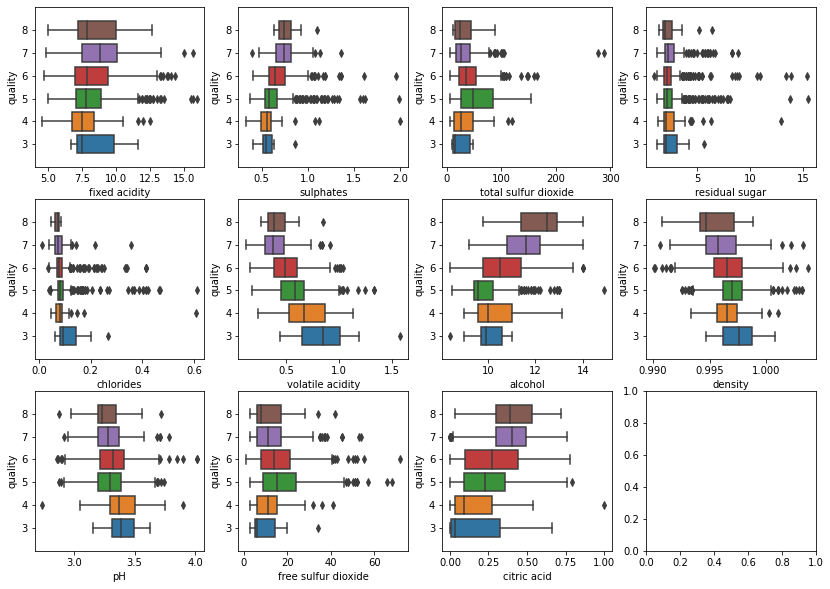

In [0]:
#plotting the box plots to visualize variance and outliers 

fig, axes = plt.subplots(3,4, figsize=(14,10))
for i in range(11):
  column=column_name[i]
  data = pd.concat([winequality_red[column],winequality_red['quality']], axis=1)
  fig1=sn.boxplot(x=column, y="quality", data=data,orient="h",ax=axes[i % 3, i%4])
  fig1.axis(ymin=-1, ymax=6);
plt.show()

**Comments :** These box plots also indicate the variance within the dataset, underlying the possible outliers.

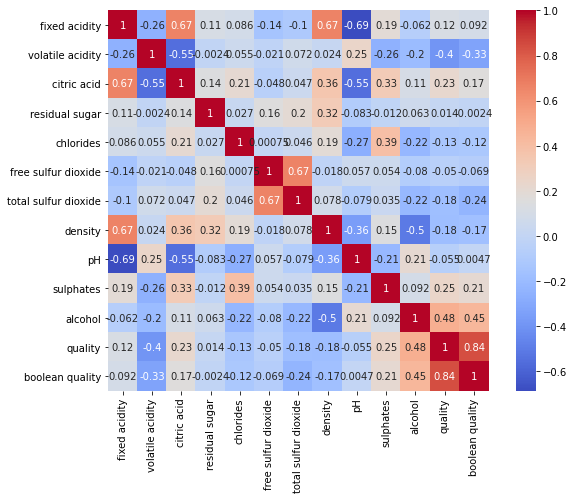

<Figure size 864x576 with 0 Axes>

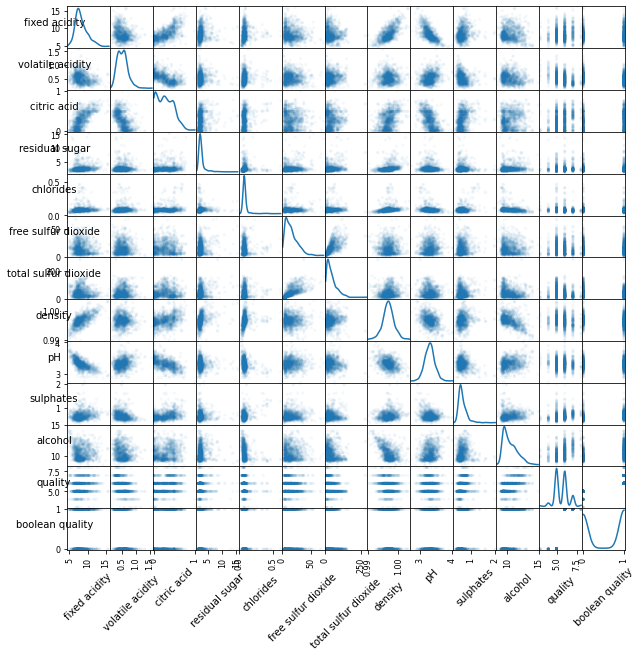

In [0]:
#graphical representation via scatterplots

corr = winequality_red.corr()
_, ax = plt.subplots(figsize=(10, 7))
ax = sn.heatmap(corr, annot=True, cmap='coolwarm', square=True)

plt.figure()

sm = pd.plotting.scatter_matrix(winequality_red, alpha=0.05, figsize=(10,10), diagonal='kde')
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]
[s.get_yaxis().set_label_coords(-0.3,0.5) for s in sm.reshape(-1)]

plt.show()

[Text(0, 0.5, 'density'), Text(0.5, 0, 'fixed acidity')]

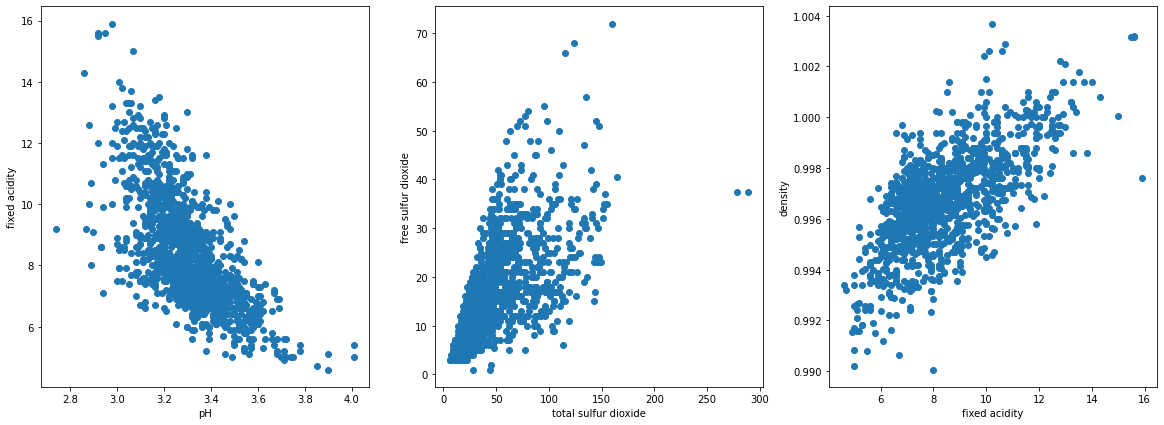

In [0]:
#zooming on specific scatter plots 

fig, (im1, im2, im3) = plt.subplots(1, 3)
fig.set_size_inches(20,7)
  
  #correlation between pH and fixed acidity (-0.69)

im1.scatter(winequality_red['pH'], winequality_red['fixed acidity'])
im1.set(xlabel='pH', ylabel='fixed acidity')

  #correlation between pH and fixed acidity (0.67)

im2.scatter(winequality_red['total sulfur dioxide'], winequality_red['free sulfur dioxide'])
im2.set(xlabel='total sulfur dioxide', ylabel='free sulfur dioxide')

  #correlation between chlorides and density (-0.55)

im3.scatter(winequality_red['fixed acidity'], winequality_red['density'])
im3.set(xlabel='fixed acidity', ylabel='density')



Comments :

We can notice that many variables are correlated between each other (3 pairs have a coefficient of correlation equal to 0.67, 1 pair at -0.69) such as fixed acidity and citric acid or fixed acidity and pH for example. We can infer that there is a redundancy of information within the dataset. This is why we will try a Principal Components Analysis (PCA) later on even if the initial dimensionality is not excessively high (11 features).

In [0]:
#dropping the column quality

winequality_red = winequality_red.drop(columns=['quality'])
winequality_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,boolean quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1.0
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1354,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1.0
1355,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0.0
1356,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1.0
1357,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0.0


## 1.3 data pre-processing

Here is the outline for the data pre-processing :

1) Handling null values

2) Normalising and standardising the given data

3) Handling outliers

4) Combining existing features resorting to PCA.

### 1.3.1 handling null values

In [0]:
#we drop null values

winequality_red.dropna(axis=0)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,boolean quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1.0
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1354,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1.0
1355,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0.0
1356,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1.0
1357,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0.0


**Comments :** We can see that there is no null values.

### 1.3.2 handling inconsistent values

In [0]:
# let's check if there is some negative values of residual sugar

winequality_red[winequality_red["residual sugar"] < 0] 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,boolean quality


In [0]:
# let's check if quatities of free sulfur dioxide are less of equal to quantities of total sulfur dioxide

winequality_red[winequality_red["free sulfur dioxide"] > winequality_red["total sulfur dioxide"]] 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,boolean quality


In [0]:
# let's check if there is some negative values of density

winequality_red[winequality_red["density"] < 0 ] 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,boolean quality


Comments : 

It seems that there is no inconsistency in the dataset for this warm up challenge.

### 1.3.3 normalising the given data 

In [0]:
#splitting the dataset into a train dataset, a test dataset and a valid dataset

from sklearn.utils import shuffle

  #shffling

winequality_red = shuffle(winequality_red, random_state=2) 

  #function for the split

def split(ar, prop=[0.6, 0.1, 0.3]):

  train_val_test_nb = np.round(np.array(prop)*len(ar)).astype(np.int)
  ar_train = ar[0:train_val_test_nb[0]]
  ar_valid = ar[train_val_test_nb[0]:train_val_test_nb[0]+train_val_test_nb[1]]
  ar_test = ar[train_val_test_nb[0]+train_val_test_nb[1]:train_val_test_nb[0]+train_val_test_nb[1]+train_val_test_nb[2]]
  return ar_train, ar_valid, ar_test

dataset_train, dataset_valid, dataset_test = split(winequality_red)

In [0]:
dataset_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,boolean quality
1345,6.7,0.320,0.44,2.4,0.061,24.0,34.0,0.99484,3.29,0.80,11.6,1.0
959,6.3,0.760,0.00,2.9,0.072,26.0,52.0,0.99379,3.51,0.60,11.5,1.0
71,6.8,0.785,0.00,2.4,0.104,14.0,30.0,0.99660,3.52,0.55,10.7,1.0
268,10.3,0.410,0.42,2.4,0.213,6.0,14.0,0.99940,3.19,0.62,9.5,1.0
1098,7.0,0.600,0.30,4.5,0.068,20.0,110.0,0.99914,3.30,1.17,10.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
48,6.6,0.500,0.04,2.1,0.068,6.0,14.0,0.99550,3.39,0.64,9.4,1.0
289,8.4,0.560,0.08,2.1,0.105,16.0,44.0,0.99580,3.13,0.52,11.0,0.0
76,7.4,0.500,0.47,2.0,0.086,21.0,73.0,0.99700,3.36,0.57,9.1,0.0
206,8.0,0.380,0.06,1.8,0.078,12.0,49.0,0.99625,3.37,0.52,9.9,1.0


In [0]:
#normalizing each dataset with MinMaxScaler from sklearn

  #train
scaler = MinMaxScaler(feature_range=(0, 1)) #all the values of the dataset are between 0 and 1.
dataset_train = scaler.fit_transform(dataset_train)
dataset_train = pd.DataFrame(dataset_train)

  #test
dataset_test = scaler.fit_transform(dataset_test)
dataset_test = pd.DataFrame(dataset_test)

  #valid
dataset_valid = scaler.fit_transform(dataset_valid)
dataset_valid = pd.DataFrame(dataset_valid)


#inputs and output
Xtrain = dataset_train.iloc[:, 0:11]
Xtest = dataset_test.iloc[:, 0:11]
Xvalid = dataset_valid.iloc[:, 0:11]

ytrain = dataset_train.iloc[:, 11]
ytest = dataset_test.iloc[:, 11]
yvalid = dataset_valid.iloc[:, 11]

### 1.3.4 handling outliers

**Comments :** We saw earlier that there could be some outliers in our dataset. We will use the zscore method to retrieve these points.

In [0]:
print('###### TRAIN #####')
  #for the training set
z_train = np.abs(stats.zscore(Xtrain))
threshold = 3  #common value  
outliers_train = np.where(z_train > threshold)
print('outliers are located at rows :', outliers_train[0])
print('number of outliers =', len(outliers_train[0]))
print('number of rows impacted by outliers =', len(list(set(outliers_train[0])))) #removing duplicates in the list
#print('percentage of outliers = ', len(outliers_train[0])/Xtrain.shape[0])

print('')
print('###### VALIDATION #####')
  #for the validation set
z_valid = np.abs(stats.zscore(Xvalid))
outliers_valid = np.where(z_valid > threshold)
print('outliers are located at rows :', outliers_valid[0])
print('number of outliers =', len(outliers_valid[0]))
print('number of rows impacted by outliers =', len(list(set(outliers_valid[0])))) #removing duplicates in the list
#print('percentage of outliers = ', len(outliers_valid[0])/Xvalid.shape[0])


###### TRAIN #####
outliers are located at rows : [ 15  22  29  38  43  45  45  45  52  63  68  79  97  97 101 105 147 147
 158 160 174 182 190 202 214 223 223 223 247 247 251 251 257 262 263 271
 314 314 329 345 345 366 367 376 382 383 383 384 411 416 421 424 428 464
 479 479 483 490 492 495 507 510 523 534 546 551 552 556 564 613 617 630
 633 637 662 662 670 670 671 671 680 687 704 704 711 711 711 717 717 737
 737 737 737 738 754 768 788 804]
number of outliers = 98
number of rows impacted by outliers = 76

###### VALIDATION #####
outliers are located at rows : [  6   7   7  24  43  49  54  57  64  71  78  83  91 123 123]
number of outliers = 15
number of rows impacted by outliers = 13


In [0]:
#dropping the rows of which outliers belong to

Xtrain = Xtrain.drop(list(set(outliers_train[0])), axis=0)
ytrain = ytrain.drop(list(set(outliers_train[0])), axis=0)

Xvalid = Xvalid.drop(list(set(outliers_valid[0])), axis=0)
yvalid = yvalid.drop(list(set(outliers_valid[0])), axis=0)

#reseting the indexes after dropping outliers

Xtrain = Xtrain.reset_index(drop=True)
ytrain = ytrain.reset_index(drop=True)

Xvalid = Xvalid.reset_index(drop=True)
yvalid = yvalid.reset_index(drop=True)

**Comments :** Removing outliers boils down to removing noise and thus decresease the probability of overfitting, this is why this step in important.


### 1.3.5 combining existing features using PCA

In [0]:
inputs= winequality_red.drop(columns=['boolean quality'])
output=winequality_red['boolean quality']

In [0]:
inputs
output

1345    1.0
959     1.0
71      1.0
268     1.0
1098    0.0
       ... 
466     1.0
299     1.0
493     1.0
527     1.0
1192    1.0
Name: boolean quality, Length: 1359, dtype: float64

In [0]:
inputs = inputs.reset_index(drop=True)
output = output.reset_index(drop=True)

In [0]:
output

0       1.0
1       1.0
2       1.0
3       1.0
4       0.0
       ... 
1354    1.0
1355    1.0
1356    1.0
1357    1.0
1358    1.0
Name: boolean quality, Length: 1359, dtype: float64

In [0]:
#PCA

pca = decomposition.PCA(n_components=3)
principal_components = pca.fit_transform(inputs)
principal_components = pd.DataFrame(principal_components)

print(pca.explained_variance_ratio_.cumsum())

principal_components


[0.9481314  0.99517676 0.99767046]


,0,1,2
0,-10.783111,10.721972,-1.431214
1,7.231655,8.816540,-1.743276
2,-16.833012,1.804630,-1.558539
3,-34.188404,-2.661808,1.801469
4,62.600669,-9.532819,-0.796843
...,...,...,...
1354,-35.378189,-3.359106,-0.507411
1355,-16.625519,-6.547608,3.313811
1356,-4.044875,4.133973,-2.120754
1357,7.227878,8.748324,0.864462


**Comments :** We can see that the first principal component (PC1) contains 94.8% of the information carried by the data set, the second principal component (PC2) contains 99.5% of the information etc. This is why PCA could be interesting in our case even if the initial dimentinality (11 features) is not excessive. In order to warm up, we decided to try PCA for some algorithms.

In [0]:
dataset_PCA = pd.concat([principal_components, output], axis=1)
dataset_PCA

,0,1,2,boolean quality
0,-10.783111,10.721972,-1.431214,1.0
1,7.231655,8.816540,-1.743276,1.0
2,-16.833012,1.804630,-1.558539,1.0
3,-34.188404,-2.661808,1.801469,1.0
4,62.600669,-9.532819,-0.796843,0.0
...,...,...,...,...
1354,-35.378189,-3.359106,-0.507411,1.0
1355,-16.625519,-6.547608,3.313811,1.0
1356,-4.044875,4.133973,-2.120754,1.0
1357,7.227878,8.748324,0.864462,1.0


We now will split the dataset into : 
- The traning set
- The testing set
- The validation set

We use the same function as we did before i.e split.

In [0]:
dataset_PCA_train, dataset_PCA_valid, dataset_PCA_test = split(dataset_PCA)

In [0]:
#We normalize each dataset exactly as before

  #train PCA
scaler = MinMaxScaler(feature_range=(0, 1)) #all the values of the dataset are between 0 and 1.
dataset_PCA_train = scaler.fit_transform(dataset_PCA_train)
dataset_PCA_train = pd.DataFrame(dataset_PCA_train)

  #test PCA
dataset_PCA_test = scaler.fit_transform(dataset_PCA_test)
dataset_PCA_test = pd.DataFrame(dataset_PCA_test)

  #valid PCA
dataset_PCA_valid = scaler.fit_transform(dataset_PCA_valid)
dataset_PCA_valid = pd.DataFrame(dataset_PCA_valid)


#Then we create the inputs and output for PCA
Xtrain_pca = dataset_PCA_train.iloc[:, 0:3]
Xtest_pca = dataset_PCA_test.iloc[:, 0:3]
Xvalid_pca = dataset_PCA_valid.iloc[:, 0:3]

ytrain_pca = dataset_PCA_train.iloc[:, 3]
ytest_pca = dataset_PCA_test.iloc[:, 3]
yvalid_pca = dataset_PCA_valid.iloc[:, 3]

In [0]:
#exporting to CSV

#no pca

Xtrain.to_csv('Xtrain.csv')
Xtest.to_csv('Xtest.csv')
Xvalid.to_csv('Xvalid.csv')

ytrain.to_csv('ytrain.csv')
ytest.to_csv('ytest.csv')
yvalid.to_csv('yvalid.csv')

#pca

Xtrain_pca.to_csv('Xtrain_pca.csv')
Xtest_pca.to_csv('Xtest_pca.csv')
Xvalid_pca.to_csv('Xvalid_pca.csv')

ytrain_pca.to_csv('ytrain_pca.csv')
ytest_pca.to_csv('ytest_pca.csv')
yvalid_pca.to_csv('yvalid_pca.csv')


# **2. Models**

In [0]:
#no PCA

Xtrain = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/IO/Xtrain.csv').drop(columns=['Unnamed: 0'])
Xtest = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/IO/Xtest.csv').drop(columns=['Unnamed: 0'])
Xvalid = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/IO/Xvalid.csv').drop(columns=['Unnamed: 0'])

ytrain = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/IO/ytrain.csv').drop(columns=['Unnamed: 0'])
ytest = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/IO/ytest.csv').drop(columns=['Unnamed: 0'])
yvalid = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/IO/yvalid.csv').drop(columns=['Unnamed: 0'])

ytrain = np.ravel(ytrain)
ytest = np.ravel(ytest)
yvalid = np.ravel(yvalid)

#PCA

Xtrain_pca = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/IO_PCA/Xtrain_pca.csv').drop(columns=['Unnamed: 0'])
Xtest_pca = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/IO_PCA/Xtest_pca.csv').drop(columns=['Unnamed: 0'])
Xvalid_pca = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/IO_PCA/Xvalid_pca.csv').drop(columns=['Unnamed: 0'])

ytrain_pca = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/IO_PCA/ytrain_pca.csv').drop(columns=['Unnamed: 0'])
ytest_pca = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/IO_PCA/ytest_pca.csv').drop(columns=['Unnamed: 0'])
yvalid_pca = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/IO_PCA/yvalid_pca.csv').drop(columns=['Unnamed: 0'])

ytrain_pca = np.ravel(ytrain_pca)
ytest_pca = np.ravel(ytest_pca)
yvalid_pca = np.ravel(yvalid_pca)

The sets use are those available on the Drive. I will try all algorithm with on two dataset: the one on which we don't apply PCA, and the one on which PCA have been applied. We work with the <b>log loss measure</b>, computable thank to the function _sklearn.metrics.log_loss(y\_true, y\_pred)_.

## 2.1. _KNN_

It is well know that KNN does not performs very well, but let's see what he can do by giving different number of nearest neighbors to take into account.

#### 2.a.i. Without PCA

In [0]:
n_neighbors = []
log_losses = []
accuracies = []

for i in range (1,51):
    n_neighbors.append(i)
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(Xtrain, ytrain)
    y_pred = knn.predict(Xvalid)
    log_loss = sklearn.metrics.log_loss(yvalid, y_pred)
    accuracy = np.mean(y_pred == yvalid)
    log_losses.append(log_loss)
    accuracies.append(accuracy)
    print('Log loss on the validation set: %.4f' % log_loss, 'with an accuracy of: accuracy of: %.4f' % accuracy,  'obtained with ', i, ' nearest neighbors')

Log loss on the validation set: 11.9773 with an accuracy of: accuracy of: 0.6532 obtained with  1  nearest neighbors
Log loss on the validation set: 13.9270 with an accuracy of: accuracy of: 0.5968 obtained with  2  nearest neighbors
Log loss on the validation set: 11.6987 with an accuracy of: accuracy of: 0.6613 obtained with  3  nearest neighbors
Log loss on the validation set: 11.6987 with an accuracy of: accuracy of: 0.6613 obtained with  4  nearest neighbors
Log loss on the validation set: 10.3060 with an accuracy of: accuracy of: 0.7016 obtained with  5  nearest neighbors
Log loss on the validation set: 10.0275 with an accuracy of: accuracy of: 0.7097 obtained with  6  nearest neighbors
Log loss on the validation set: 10.0275 with an accuracy of: accuracy of: 0.7097 obtained with  7  nearest neighbors
Log loss on the validation set: 9.7489 with an accuracy of: accuracy of: 0.7177 obtained with  8  nearest neighbors
Log loss on the validation set: 8.6348 with an accuracy of: accur

In [0]:
min_log_loss = min(log_losses)
n_neigbors = np.argmin(log_losses) + 1
accuracy = accuracies[np.argmin(log_losses)]
print('Minimum log loss on the validation set of %.2f' % min_log_loss, 'with an accuracy of %.4f' % accuracy,  'obtained with ', n_neigbors, ' nearest neighbors')

Minimum log loss on the validation set of 8.36 with an accuracy of 0.7581 obtained with  22  nearest neighbors


As we want to minimize the log loss, we choose the number of neighbors that minimizes this metric. This minimum of <b>8.36</b> is reached with 22 nearest neighbors, and the associated accuracy is 75.81%. As expected, we can do better.

#### 2.b.ii. With PCA

In [0]:
# KNN on the dataset with PCA
n_neighbors_pca = []
log_losses_pca = []
accuracies_pca = []

for i in range (1,51):
    n_neighbors_pca.append(i)
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(Xtrain_pca, ytrain_pca)
    y_pred = knn.predict(Xvalid_pca)
    log_loss_pca = sklearn.metrics.log_loss(yvalid_pca, y_pred)
    accuracy_pca = np.mean(y_pred == yvalid_pca)
    log_losses_pca.append(log_loss_pca)
    accuracies_pca.append(accuracy_pca)

In [0]:
min_log_loss_pca = min(log_losses_pca)
n_neigbors_pca = np.argmin(log_losses_pca) + 1
accuracy_pca = accuracies_pca[np.argmin(log_losses_pca)]
print('Minimum log loss on the validation set of %.2f' % min_log_loss_pca, 'with an accuracy of %.4f' % accuracy_pca,  'obtained with ', n_neigbors_pca, ' nearest neighbors')

Minimum log loss on the validation set of 13.46 with an accuracy of 0.6103 obtained with  6  nearest neighbors


We can see that the results are much less good when using PCA as the log loss is now **13.46** (compared to 8.36 without PCA), and the accuracy is 61.06% (compared to 75.81%). Using the set without PCA is, for KNN, better. 

#### 2.a.iii. Comparison of the results

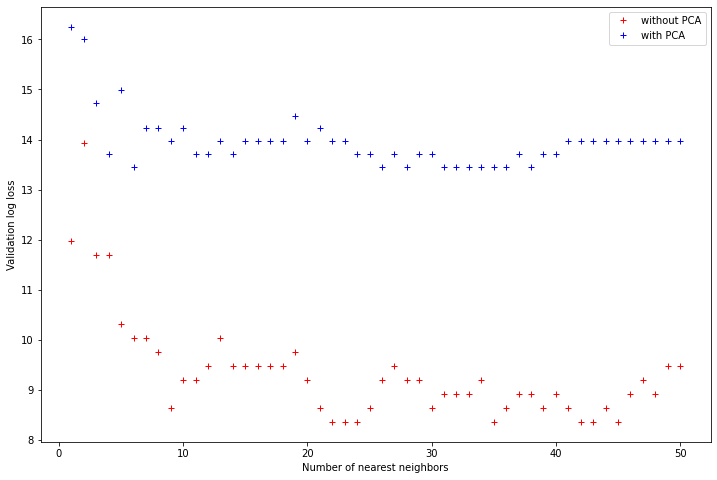

In [0]:
plt.xlabel('Number of nearest neighbors')
plt.ylabel('Validation log loss')
plt.plot(n_neighbors, log_losses, '+', color = 'r', label = "without PCA")
plt.plot(n_neighbors, log_losses_pca, '+', color = 'b', label = "with PCA")
plt.legend()
plt.show()

Not using PCA is, by far, better than using it.

In [0]:
# Saving the best model obtained with KNN
knn = KNeighborsClassifier(n_neighbors = 22)
knn.fit(Xtrain, ytrain)
y_pred_knn = knn.predict(Xvalid)

##2.2 *Logistic regression for classification*

Even if logistic regression is not always adapted to multiclasses problem (our case), let's see what it can do on our data. 

In [0]:
warnings.simplefilter('ignore')
regularization_parameter = []
train_log_loss_lr = []
valid_log_loss_lr = []
train_accuracy_lr = []
valid_accuracy_lr = []

for c in range (1, 500, 5):
    regularization_parameter.append(c)
    logreg = LogisticRegression(C=c).fit(Xtrain, ytrain)
    y_pred_train = logreg.predict(Xtrain)
    y_pred_valid = logreg.predict(Xvalid)
    train_log_loss_lr.append(sklearn.metrics.log_loss(ytrain, y_pred_train))
    valid_log_loss_lr.append(sklearn.metrics.log_loss(yvalid, y_pred_valid))
    train_accuracy_lr.append(logreg.score(Xtrain, ytrain))
    valid_accuracy_lr.append(logreg.score(Xvalid, yvalid))

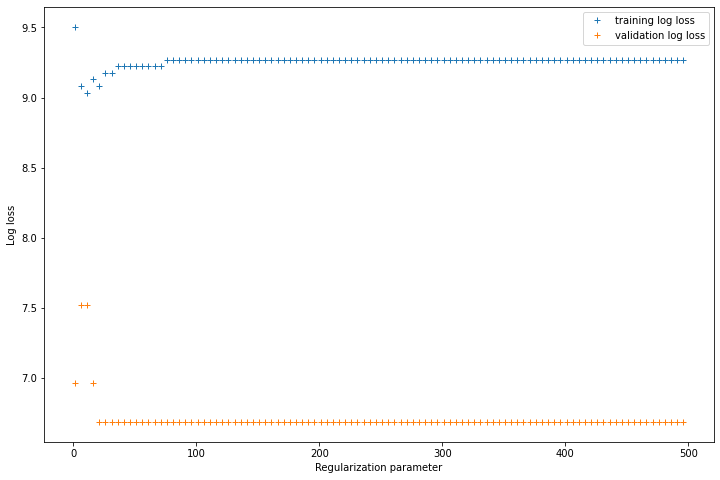

In [0]:
plt.xlabel('Regularization parameter')
plt.ylabel('Log loss')
plt.plot(regularization_parameter, train_log_loss_lr, '+', label = "training log loss")
plt.plot(regularization_parameter, valid_log_loss_lr, '+', label = "validation log loss")
plt.legend()
plt.show()

In [0]:
min_log_loss = min(valid_log_loss_lr)
regularization_param = regularization_parameter[np.argmin(valid_log_loss_lr)]
accuracy = valid_accuracy_lr[np.argmin(valid_log_loss_lr)]
print('Minimum log loss on the validation set of %.2f' % min_log_loss, 'with an accuracy of %.4f' % accuracy,  'obtained with a regularization parameter =', regularization_param)

Minimum log loss on the validation set of 6.68 with an accuracy of 0.8065 obtained with a regularization parameter = 21


_Logistic regression_ gives worse results than KNN, with a minimum validation log loss of <b>6.68</b> that is smaller than the one we found with KNN. The corresponding accuracy is also better than KNN (80.65%) obtained with a regularization parameter C = 21, but the accuracy is still not very good. 

In [0]:
# Saving the best model obtained with logistic regression
logreg = LogisticRegression(C=21).fit(Xtrain, ytrain)
y_pred_logreg = logreg.predict(Xvalid)

## 2.3 *Decision tree*

In [0]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(Xtrain, ytrain)
y_pred_train = tree.predict(Xtrain)
y_pred_valid = tree.predict(Xvalid)
log_loss_train = sklearn.metrics.log_loss(ytrain, y_pred_train)
log_loss_valid = sklearn.metrics.log_loss(yvalid, y_pred_valid)
print('Log loss on the training set %.4f' % log_loss_train, 'with an accuracy of %.4f' % tree.score(Xtrain, ytrain))
print('Log loss on the validation set %.4f' % log_loss_valid, 'with an accuracy of %.4f' % tree.score(Xvalid, yvalid))

Log loss on the training set 0.0000 with an accuracy of 1.0000
Log loss on the validation set 11.4202 with an accuracy of 0.6694


Without putting any constrains on the depth of the tree, there is overfitting (as the value of the training accuracy shows, as it is equals to 1.00). That is why the accuracy on the validation is only 66.94%, and the associated log loss of <b>11.42</b> is not good. Let's constrain the depth of the tree by adding a max_depth value. 

In [0]:
tree = DecisionTreeClassifier(max_depth = 5, random_state=0)
tree.fit(Xtrain, ytrain)
y_pred_train = tree.predict(Xtrain)
y_pred_valid = tree.predict(Xvalid)
log_loss_train = sklearn.metrics.log_loss(ytrain, y_pred_train)
log_loss_valid = sklearn.metrics.log_loss(yvalid, y_pred_valid)
print('Log loss on the training set %.2f' % log_loss_train, 'with an accuracy of %.4f' % tree.score(Xtrain, ytrain))
print('Log loss on the validation set %.2f' % log_loss_valid, 'with an accuracy of %.4f' % tree.score(Xvalid, yvalid))

Log loss on the training set 6.96 with an accuracy of 0.7984
Log loss on the validation set 7.24 with an accuracy of 0.7903


As expected, the tree no more overfits the training set, as the training accuracy is only of 79.84%. Thus, it performs better on the validation set, with an accuracy of 79.03%, and the log loss is also smaller with a value of <b>7.24</b>. Let's tune the parameter _max_depth_ to see if we can get even better results.

In [0]:
max_depths = []
train_log_loss_tree = []
valid_log_loss_tree = []
train_accuracy_tree = []
valid_accuracy_tree = []

for depth in range (1, 51):
    max_depths.append(depth)
    tree = DecisionTreeClassifier(max_depth = depth, random_state=0)
    tree.fit(Xtrain, ytrain)
    y_pred_train = tree.predict(Xtrain)
    y_pred_valid = tree.predict(Xvalid)
    train_log_loss_tree.append(sklearn.metrics.log_loss(ytrain, y_pred_train))
    valid_log_loss_tree.append(sklearn.metrics.log_loss(yvalid, y_pred_valid))
    train_accuracy_tree.append(tree.score(Xtrain, ytrain))
    valid_accuracy_tree.append(tree.score(Xvalid, yvalid))

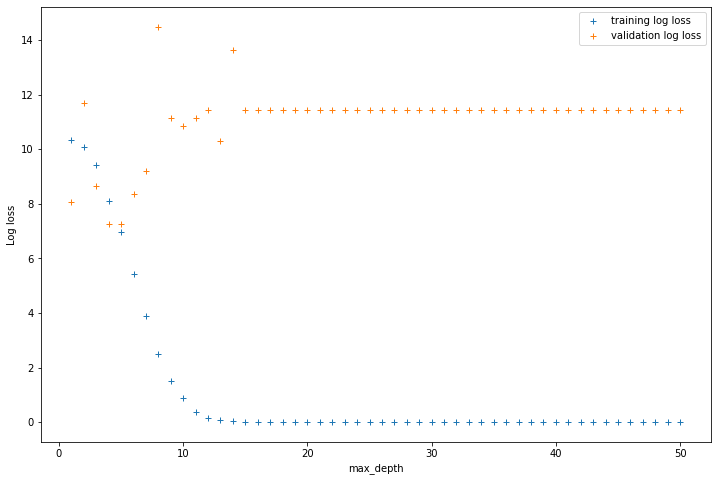

In [0]:
plt.xlabel('max_depth')
plt.ylabel('Log loss')
plt.plot(max_depths, train_log_loss_tree, '+', label = "training log loss")
plt.plot(max_depths, valid_log_loss_tree, '+', label = "validation log loss")
plt.legend()
plt.show()

In [0]:
min_log_loss = min(valid_log_loss_tree)
depth = max_depths[np.argmin(valid_log_loss_tree)]
accuracy = valid_accuracy_tree[np.argmin(valid_log_loss_tree)]
print('Minimum log loss on the validation set of %.2f' % min_log_loss, 'with an accuracy of %.4f' % accuracy,  'obtained with a max depth of', depth)

Minimum log loss on the validation set of 7.24 with an accuracy of 0.7903 obtained with a max depth of 4


The overfitting occurs very quickly. The best result is obtained with a maximal depth of 4, a log loss of <b>7.24</b> and a validation accuracy of 79.03%, which is a bit better than the score we obtained with KNN, but not better that the score we had for logistic regression for classification.
The results obtained so far are not that good, we let's try more complex models. 

In [0]:
# Saving the best model obtained with decision tree
tree = DecisionTreeClassifier(max_depth = 4, random_state=0)
tree.fit(Xtrain, ytrain)
y_pred_tree = tree.predict(Xvalid)

## 2.4 *Random forest*

In [0]:
n_trees = []
train_log_loss_forest = []
valid_log_loss_forest = []
train_accuracy_forest = []
valid_accuracy_forest = []
min_log_loss = 100

for n in range (1, 101):
    n_trees.append(n)
    forest = RandomForestClassifier(n_estimators=n)
    forest.fit(Xtrain, ytrain)
    y_pred_train = forest.predict(Xtrain)
    y_pred_valid = forest.predict(Xvalid)
    train_log_loss_forest.append(sklearn.metrics.log_loss(ytrain, y_pred_train))
    valid_log_loss_forest.append(sklearn.metrics.log_loss(yvalid, y_pred_valid))
    train_accuracy_forest.append(forest.score(Xtrain, ytrain))
    valid_accuracy_forest.append(forest.score(Xvalid, yvalid))
    if sklearn.metrics.log_loss(yvalid, y_pred_valid) < min_log_loss:
      n_tree = n
      min_log_loss = sklearn.metrics.log_loss(yvalid, y_pred_valid)
      accuracy = forest.score(Xvalid, yvalid)
      y_pred_forest = y_pred_valid

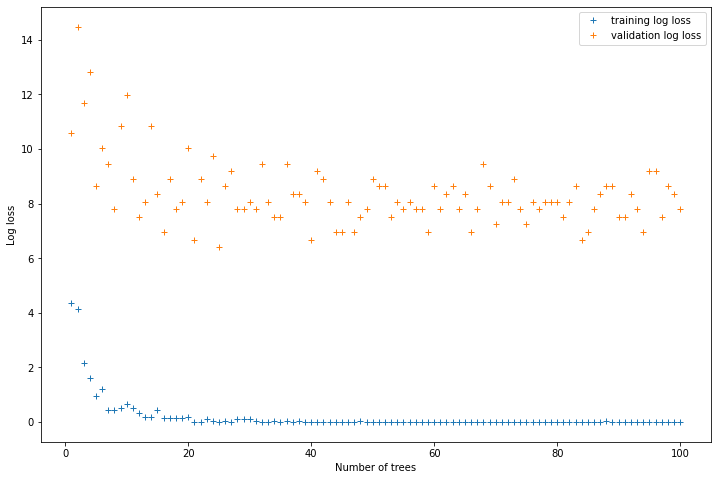

In [0]:
plt.xlabel('Number of trees')
plt.ylabel('Log loss')
plt.plot(n_trees, train_log_loss_forest, '+', label = "training log loss")
plt.plot(n_trees, valid_log_loss_forest, '+', label = "validation log loss")
plt.legend()
plt.show()

In [0]:
min_log_loss = min(valid_log_loss_forest)
n_tree = n_trees[np.argmin(valid_log_loss_forest)]
accuracy = valid_accuracy_forest[np.argmin(valid_log_loss_forest)]
print('Minimum log loss on the validation set of %.2f' % min_log_loss, 'with an accuracy of %.4f' % accuracy,  'obtained with ', n_tree, 'trees')

Minimum log loss on the validation set of 6.41 with an accuracy of 0.8145 obtained with  25 trees


With 25 trees, our random forest gives us the best results until here: a validation log loss of <b>6.41</b> (corresponding to an accuracy of 81.45% on the validation set.

## 2.5 *Gradient boosted regression trees*

In [0]:
n_depths = []
train_log_loss_gbrt = []
valid_log_loss_gbrt = []
train_accuracy_gbrt = []
valid_accuracy_gbrt = []

for i in range (1, 31):
    n_depths.append(i)
    gbrt = GradientBoostingClassifier(max_depth = i)
    gbrt.fit(Xtrain, ytrain)
    y_pred_train = gbrt.predict(Xtrain)
    y_pred_valid = gbrt.predict(Xvalid)
    train_log_loss_gbrt.append(sklearn.metrics.log_loss(ytrain, y_pred_train))
    valid_log_loss_gbrt.append(sklearn.metrics.log_loss(yvalid, y_pred_valid))
    train_accuracy_gbrt.append(gbrt.score(Xtrain, ytrain))
    valid_accuracy_gbrt.append(gbrt.score(Xvalid, yvalid))

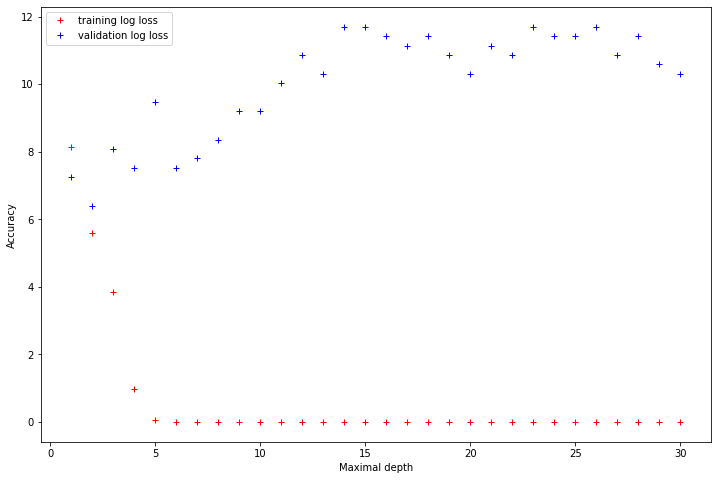

In [0]:
plt.xlabel('Maximal depth')
plt.ylabel('Accuracy')
plt.plot(n_depths, train_log_loss_gbrt, '+', color = 'r', label = "training log loss")
plt.plot(n_depths, valid_log_loss_gbrt, '+', color = 'b', label = "validation log loss")
plt.legend()
plt.show()

In [0]:
min_log_loss = min(valid_log_loss_gbrt)
depth = n_depths[np.argmin(valid_log_loss_gbrt)]
accuracy = valid_accuracy_gbrt[np.argmin(valid_log_loss_gbrt)]
print('Minimum log loss on the validation set of %.2f' % min_log_loss, 'with an accuracy of %.4f' % accuracy,  'obtained with a max_depth of ', depth)

Minimum log loss on the validation set of 6.41 with an accuracy of 0.8145 obtained with a max_depth of  2


The Gradient Boosted regression tree method allows to obtain, with a depth of 2, a log loss on the validation set of <b>6.41</b> and the corresponding accuracy equals to 81.45%, the best result until now!!

In [0]:
# Saving the best model obtained with gradient boosted regression trees
gbrt = GradientBoostingClassifier(max_depth = 2)
gbrt.fit(Xtrain, ytrain)
y_pred_gbrt = gbrt.predict(Xvalid)

## 2.6 *Neural Networks*

According to the problematic we set, we also tried to evaluate the performance of Neural Networks algorithms. Of course, it seems obvious that we do not have enough data to make their uses relevant.

For the moment, the parameters are the ones put by default (max_iter = 1000 in order for the algorithm to converge)

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

alpha = 0.01 ## used for regularization (L2 regularization) term which helps in avoiding overfitting by penalizing weights with large magnitudes
hidden_layer_sizes= 70
max_iter = 1000

clf = MLPClassifier(solver='adam',alpha = alpha ,hidden_layer_sizes = hidden_layer_sizes, random_state= None, max_iter = max_iter )

clf.fit(Xtrain, ytrain)

y_pred_nn = clf.predict(Xvalid)


# Accuracy 
print('Accuracy on the training set: %.4f' % clf.score(Xtrain, ytrain))
print('Accuracy on the testing set: %.4f' % clf.score(Xtest, ytest))
print('Accuracy on the validation set: %.4f' % clf.score(Xvalid, yvalid))

#Log-losses : 
print('Log loss on the validation set: %.4f' % metrics.log_loss(yvalid, y_pred_nn))


Accuracy on the training set: 0.7616
Accuracy on the testing set: 0.6887
Accuracy on the validation set: 0.8065
Log loss on the validation set: 6.6850


### 2.6.1 *Regularization parameter*

In [0]:
# Compute train and test errors
alphas = np.logspace(-5, 1, 60)
clf = MLPClassifier(solver='adam',hidden_layer_sizes = hidden_layer_sizes,max_iter = max_iter )
train_errors = list()
valid_errors = list()
for alpha in alphas:
    clf.set_params(alpha=alpha)
    clf.fit(Xtrain, ytrain.values.ravel())
    train_errors.append(clf.score(Xtrain, ytrain))
    valid_errors.append(clf.score(Xvalid, yvalid))

Optimal regularization parameter : 0.036251170499885355


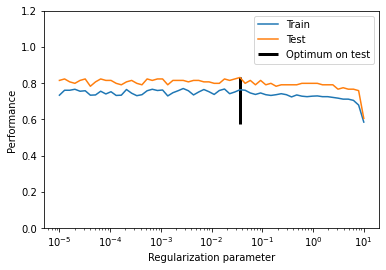

In [0]:
i_alpha_optim = np.argmax(valid_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)

# Plot results functions
plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, valid_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(valid_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([0, 1.2])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')
plt.legend()
plt.show()

It seems that the regularization parameter doesn't change much the accuracy (both in training and in the testing set). Let us see if if it different with sklearn methods

### 2.6.2. Parameters tuning using sklearn methods

Here, we use the GridSearchCV from the model_selection module. It allows us to determine optimized parameters using the K-cross-validation method (by default, the value for K=5)

In [0]:
clf_2 = MLPClassifier(solver='adam',alpha = alpha, random_state= None, max_iter = max_iter)

In [0]:
model = model_selection.GridSearchCV(clf_2,{'hidden_layer_sizes':np.arange(30,100,20),'alpha':np.logspace(-3, 1, 60)})
model.fit(Xtrain,ytrain.values.ravel())

In [0]:
result = pd.DataFrame(model.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.720143,0.384697,0.001354,0.000123,0.001,30,"{'alpha': 0.001, 'hidden_layer_sizes': 30}",0.751678,0.738255,0.825503,0.777027,0.729730,0.764439,0.034469,26
1,2.310434,0.327639,0.001708,0.000063,0.001,50,"{'alpha': 0.001, 'hidden_layer_sizes': 50}",0.751678,0.758389,0.805369,0.743243,0.722973,0.756330,0.027257,144
2,2.726080,0.179083,0.001740,0.000039,0.001,70,"{'alpha': 0.001, 'hidden_layer_sizes': 70}",0.765101,0.731544,0.805369,0.743243,0.729730,0.754997,0.028164,164
3,3.233548,0.028940,0.001749,0.000012,0.001,90,"{'alpha': 0.001, 'hidden_layer_sizes': 90}",0.751678,0.744966,0.818792,0.750000,0.750000,0.763087,0.027943,42
4,0.861832,0.390745,0.001432,0.000208,0.00116895,30,"{'alpha': 0.0011689518164985776, 'hidden_layer...",0.751678,0.731544,0.791946,0.770270,0.709459,0.750980,0.028819,205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,0.465259,0.010335,0.001770,0.000014,8.55467,90,"{'alpha': 8.554672535565684, 'hidden_layer_siz...",0.751678,0.691275,0.778523,0.750000,0.750000,0.744295,0.028644,235
236,0.295900,0.037517,0.001289,0.000053,10,30,"{'alpha': 10.0, 'hidden_layer_sizes': 30}",0.771812,0.704698,0.778523,0.729730,0.702703,0.737493,0.032272,239
237,0.435240,0.014538,0.001690,0.000026,10,50,"{'alpha': 10.0, 'hidden_layer_sizes': 50}",0.758389,0.704698,0.771812,0.736486,0.702703,0.734818,0.027805,240
238,0.460597,0.033643,0.001742,0.000026,10,70,"{'alpha': 10.0, 'hidden_layer_sizes': 70}",0.765101,0.704698,0.771812,0.743243,0.709459,0.738863,0.027659,237


Here, we get the results for the 239 configurations of parameters. Let us only select the five which gives the better "rank_test

In [0]:
result.loc[result['rank_test_score'] <= 5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
19,3.198378,0.024210,0.001742,0.000038,0.00186718,90,"{'alpha': 0.0018671810912919207, 'hidden_layer...",0.751678,0.765101,0.812081,0.790541,0.736486,0.771177,0.027087,3
58,2.850431,0.082053,0.001749,0.000042,0.00889513,70,"{'alpha': 0.008895134973108237, 'hidden_layer_...",0.765101,0.771812,0.812081,0.783784,0.736486,0.773853,0.024645,1
59,3.171984,0.077157,0.001783,0.000025,0.00889513,90,"{'alpha': 0.008895134973108237, 'hidden_layer_...",0.765101,0.765101,0.812081,0.770270,0.743243,0.771159,0.022486,5
87,3.022090,0.382260,0.001770,0.000037,0.0265295,90,"{'alpha': 0.02652948464431896, 'hidden_layer_s...",0.758389,0.758389,0.825503,0.763514,0.750000,0.771159,0.027516,4
94,2.599681,0.322147,0.001748,0.000040,0.0362512,70,"{'alpha': 0.036251170499885334, 'hidden_layer_...",0.758389,0.771812,0.825503,0.770270,0.743243,0.773844,0.027788,2


So, we will choose : hidden_layer_sizes = 70 ; param_alpha = 0.01.

##2.7 *SVM*

With joint datsets

without PCA

In [0]:
# kernel : Radial function basis (exp(-||x-x'||²/2s²))

svm_rbf_joint=sklearn.svm.SVC()
svm_rbf_joint.fit(Xtrain,ytrain) 
score_svm_rbf_joint=[svm_rbf_joint.score(Xtrain, ytrain),svm_rbf_joint.score(Xvalid, yvalid),svm_rbf_joint.score(Xtest, ytest)]
y_pred_svm_rbf = svm_rbf_joint.predict(Xvalid)
valid_log_loss_svm_rbf = sklearn.metrics.log_loss(yvalid, y_pred_svm_rbf)

# kernel : linear

svm_linear_joint=sklearn.svm.SVC(kernel='linear')
svm_linear_joint.fit(Xtrain,ytrain) 
score_svm_linear_joint=[svm_linear_joint.score(Xtrain, ytrain),svm_linear_joint.score(Xvalid, yvalid),svm_linear_joint.score(Xtest, ytest)]
y_pred_svm_linear = svm_linear_joint.predict(Xvalid)
valid_log_loss_svm_linear = sklearn.metrics.log_loss(yvalid, y_pred_svm_linear)

# kernel : polynomial

svm_poly_joint=sklearn.svm.SVC(kernel='poly')
svm_poly_joint.fit(Xtrain,ytrain) 
score_svm_poly_joint=[svm_poly_joint.score(Xtrain, ytrain),svm_poly_joint.score(Xvalid, yvalid),svm_poly_joint.score(Xtest, ytest)]
y_pred_svm_poly = svm_poly_joint.predict(Xvalid)
valid_log_loss_svm_poly = sklearn.metrics.log_loss(yvalid, y_pred_svm_poly)

# kernel : sigmoid

svm_sigmoid_joint=sklearn.svm.SVC(kernel='sigmoid')
svm_sigmoid_joint.fit(Xtrain,ytrain) 
score_svm_sigmoid_joint=[svm_sigmoid_joint.score(Xtrain, ytrain),svm_sigmoid_joint.score(Xvalid, yvalid),svm_sigmoid_joint.score(Xtest, ytest)]
y_pred_svm_sigmoid = svm_sigmoid_joint.predict(Xvalid)
valid_log_loss_svm_sigmoid = sklearn.metrics.log_loss(yvalid, y_pred_svm_sigmoid)

In [0]:
print('SVM - RBF : accuracy on the validation set =', score_svm_rbf_joint[1]*100, '% ', 'and validation log loss = ', valid_log_loss_svm_rbf)
print('SVM - LINEAR : accuracy on the validation set =', score_svm_linear_joint[1]*100, '%', 'and validation log loss = ', valid_log_loss_svm_linear)
print('SVM - POLYNOMIAL : accuracy on the validation set =', score_svm_poly_joint[1]*100, '%', 'and validation log loss = ', valid_log_loss_svm_poly)
print('SVM - SIGMOID : accuracy on the validation set =', score_svm_sigmoid_joint[1]*100, '%', 'and validation log loss = ', valid_log_loss_svm_sigmoid)

SVM - RBF : accuracy on the validation set = 76.61290322580645 %  and validation log loss =  8.077687992130178
SVM - LINEAR : accuracy on the validation set = 77.41935483870968 % and validation log loss =  7.799149472816381
SVM - POLYNOMIAL : accuracy on the validation set = 77.41935483870968 % and validation log loss =  7.799149472816381
SVM - SIGMOID : accuracy on the validation set = 54.03225806451613 % and validation log loss =  15.87670849761911


With PCA

In [0]:
# kernel : Radial function basis (exp(-||x-x'||²/2s²))
svm_rbf_joint_pca=sklearn.svm.SVC()
svm_rbf_joint_pca.fit(Xtrain_pca,ytrain_pca) 
score_svm_rbf_joint_pca=[svm_rbf_joint_pca.score(Xtrain_pca, ytrain_pca),svm_rbf_joint_pca.score(Xvalid_pca, yvalid_pca),svm_rbf_joint_pca.score(Xtest_pca, ytest_pca)]
y_pred_svm_rbf_pca = svm_rbf_joint_pca.predict(Xvalid_pca)
valid_log_loss_svm_rbf_pca = sklearn.metrics.log_loss(yvalid_pca, y_pred_svm_rbf_pca)

# kernel : linear
svm_linear_joint_pca=sklearn.svm.SVC(kernel='linear')
svm_linear_joint_pca.fit(Xtrain_pca,ytrain_pca) 
score_svm_linear_joint_pca=[svm_linear_joint_pca.score(Xtrain_pca, ytrain_pca),svm_linear_joint_pca.score(Xvalid_pca, yvalid_pca),svm_linear_joint_pca.score(Xtest_pca, ytest_pca)]
y_pred_svm_linear_pca = svm_linear_joint_pca.predict(Xvalid_pca)
valid_log_loss_svm_linear_pca = sklearn.metrics.log_loss(yvalid_pca, y_pred_svm_linear_pca)

# kernel : polynomial
svm_poly_joint_pca=sklearn.svm.SVC(kernel='poly')
svm_poly_joint_pca.fit(Xtrain_pca,ytrain_pca) 
score_svm_poly_joint_pca=[svm_poly_joint_pca.score(Xtrain_pca, ytrain_pca),svm_poly_joint_pca.score(Xvalid_pca, yvalid_pca),svm_poly_joint_pca.score(Xtest_pca, ytest_pca)]
y_pred_svm_poly_pca = svm_poly_joint_pca.predict(Xvalid_pca)
valid_log_loss_svm_poly_pca = sklearn.metrics.log_loss(yvalid_pca, y_pred_svm_poly_pca)

# kernel : sigmoid
svm_sigmoid_joint_pca=sklearn.svm.SVC(kernel='sigmoid')
svm_sigmoid_joint_pca.fit(Xtrain_pca,ytrain_pca) 
score_svm_sigmoid_joint_pca=[svm_sigmoid_joint_pca.score(Xtrain_pca, ytrain_pca),svm_sigmoid_joint_pca.score(Xvalid_pca, yvalid_pca),svm_sigmoid_joint_pca.score(Xtest_pca, ytest_pca)]
y_pred_svm_sigmoid_pca = svm_sigmoid_joint_pca.predict(Xvalid_pca)
valid_log_loss_svm_sigmoid_pca = sklearn.metrics.log_loss(yvalid_pca, y_pred_svm_sigmoid_pca)

In [0]:
print('### With PCA ###')
print('SVM - RBF : accuracy on the validation set =', score_svm_rbf_joint_pca[1]*100, '%', 'and validation log loss = ', valid_log_loss_svm_rbf_pca)
print('SVM - LINEAR : accuracy on the validation set =', score_svm_linear_joint_pca[1]*100, '%', 'and validation log loss = ', valid_log_loss_svm_linear_pca)
print('SVM - POLY : accuracy on the validation set =', score_svm_poly_joint_pca[1]*100, '%', 'and validation log loss = ', valid_log_loss_svm_poly_pca)
print('SVM - SIGMOID : accuracy on the validation set =', score_svm_sigmoid_joint_pca[1]*100, '%', 'and validation log loss = ', valid_log_loss_svm_sigmoid_pca)

### With PCA ###
SVM - RBF : accuracy on the validation set = 58.82352941176471 % and validation log loss =  14.222172470394552
SVM - LINEAR : accuracy on the validation set = 56.61764705882353 % and validation log loss =  14.984074881990306
SVM - POLY : accuracy on the validation set = 57.35294117647059 % and validation log loss =  14.730107411458388
SVM - SIGMOID : accuracy on the validation set = 42.64705882352941 % and validation log loss =  19.80913345548895


# **3. Model selection and merging the results**

We obtained different predictions with different models: KNN, logistic regression, decision tree, random forest, gradient boosted regression trees, SVM and a neural network. Here is a recap of the log losses and the accuracies found on the validation set.

In [0]:
data = [[8.36, '75.81%', 'n_neighbors = 22', '-'], [6.68, '80.65%', 'regularization param = 21', '-'], [7.24, '79.03%', 'max depth = 4', '-'], [6.41, '81.45%', 'n_trees = 25', '-'], [6.41, '81.45%', 'max depth = 2', '-'], ['8.08', '76.61%', '-', '-'], ['7.80', '77.42%', '-', '-'], ['7.80', '77.42%', '-', '-'], ['15.9', '54.03%', '-', '-'], ['6.69', '80.65%', 'regularization param = 0.01', 'hidden_layer_sizes = 70']]
results = pd.DataFrame(data, columns=['Validation log loss', 'Validation accuracy', 'Tuned parameters 1', 'Tuned parameters 2'], index=['KNN', 'Logistic regression', 'Decision tree', 'Random forests', 'GBRT', 'SVM rbf','SVM linear','SVM poly','SVM sigmoid', 'Neural network'])

results

,Validation log loss,Validation accuracy,Tuned parameters 1,Tuned parameters 2
KNN,8.36,75.81%,n_neighbors = 22,-
Logistic regression,6.68,80.65%,regularization param = 4,-
Decision tree,7.24,79.03%,max depth = 4,-
Random forests,6.41,81.45%,n_trees = 25,-
GBRT,6.41,81.45%,max depth = 2,-
SVM rbf,8.08,76.61%,-,-
SVM linear,7.80,77.42%,-,-
SVM poly,7.80,77.42%,-,-
SVM sigmoid,15.9,54.03%,-,-
Neural network,6.69,80.65%,regularization param = 0.01,hidden_layer_sizes = 70


We can see that the _random forest_ is doing the best job on our dataset, with a log loss of **6.41**. Some other models also work well, such as the _gradient boosted regression tree_ (log loss of **6.41**), the _logistic regression_ (log loss of **6.68**) but also the _neural network_ (log loss of **6.69**).

Let's see how merging the results of these good models works on the validation set.

In [0]:
pred_matrix_merge = [y_pred_logreg, y_pred_forest, y_pred_gbrt, y_pred_nn]
y_mean_valid = np.mean(pred_matrix_merge, axis=0)
y_pred_merge = [round(i) for i in y_mean_valid]

log_loss_merge = sklearn.metrics.log_loss(yvalid, y_pred_merge)
accuracy_merge = sklearn.metrics.accuracy_score(yvalid, y_pred_merge)
print('Log loss when merging the output of all models:', log_loss_merge)
print('Accuracy when merging the output of all models:', accuracy_merge)

Log loss when merging the output of all models: 6.684982498828453
Accuracy when merging the output of all models: 0.8064516129032258


We can see than the log loss is not better than using only random forests or GBRT. Let's see what merging only logistic regression, random forests and GBRT gives.

In [0]:
pred_matrix_merge = [y_pred_logreg, y_pred_forest, y_pred_gbrt]
y_mean_valid = np.mean(pred_matrix_merge, axis=0)
y_pred_merge = [round(i) for i in y_mean_valid]

log_loss_merge = sklearn.metrics.log_loss(yvalid, y_pred_merge)
accuracy_merge = sklearn.metrics.accuracy_score(yvalid, y_pred_merge)
print('Log loss when merging the output of all models:', log_loss_merge)
print('Accuracy when merging the output of all models:', accuracy_merge)

Log loss when merging the output of all models: 6.127911908567234
Accuracy when merging the output of all models: 0.8225806451612904


Merging those 3 algorithms is more efficient, as it allows to reach the smallest log loss until now, **6.13** (and a associated accuracy of 82.26%).

**To conclude, the best model is the one that takes the majoritary class among  the Logistic regression, random forests and Gradient boosted regression tree.**

# **4. Testing and conclusion**

Now that we kept the model that performs the best on the validation set (a merge of logistic regression, random forests and GBRT), let's test it on the testing set.

In [0]:
# Best model obtained with logistic regression
logreg_test = LogisticRegression(C=21).fit(Xtrain, ytrain)
y_pred_test_logreg = logreg_test.predict(Xtest)

In [0]:
# Best model obtained with random forests
forest_test = RandomForestClassifier(n_estimators = 25).fit(Xtrain, ytrain)
y_pred_test_forest = forest_test.predict(Xtest)

In [0]:
# Best model obtained with GBRT
gbrt_test = GradientBoostingClassifier(max_depth = 2).fit(Xtrain, ytrain)
y_pred_test_gbrt = gbrt_test.predict(Xtest)

In [0]:
pred_test_matrix_merge = [y_pred_test_logreg, y_pred_test_forest, y_pred_test_gbrt]
y_mean_test = np.mean(pred_test_matrix_merge, axis=0)
y_pred_test_merge = [round(i) for i in y_mean_test]

log_loss_test = sklearn.metrics.log_loss(ytest, y_pred_test_merge)
accuracy_test = sklearn.metrics.accuracy_score(ytest, y_pred_test_merge)
print('Log loss when merging the output of all models:', log_loss_test)
print('Accuracy when merging the output of all models:', accuracy_test)

Log loss when merging the output of all models: 9.989330340124383
Accuracy when merging the output of all models: 0.7107843137254902


After having tested the best model on the testing set, we finally get a log loss of **9.99**, which is less good than the results on the validation set. 